# Import Modules

In [45]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct
import heapq

# Implementation

Quantization Matrix

In [22]:
quantization = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
])

## Compress

### DCT

In [23]:
'''
DCT Function
Description:
    Calculate the transformed of a image, breaking it in bloks of 8x8
    Use two times the dct for 1D, each time for one axis of the image
Input: Original image
Output: image transformed
Warning: Need to deal with images that are not multiple of 8
'''

def DCT(img):
    Y = np.zeros(img.shape)

    U = img.shape[0]//8
    V = img.shape[1]//8

    for u in range(U):
        for v in range(V):
            img_blck = img[u*8: u*8 + 8, v*8: v*8 + 8]
            Y[u*8: u*8 + 8, v*8: v*8 + 8] = dct(dct(img_blck, axis=0, norm='ortho'), axis=1, norm='ortho')
    
    return Y

### DCT + Quantization

In [24]:
'''
Function: quant_DCT
Description:
    For each block 8x8 from the image transformed
    Is divided by the quantization matrix

Input: image transformed
Output: image tranformed divided by quantization 

Warning: using the global variable img
'''

def quant_DCT(Y):
    Y_quant = np.zeros(img.shape)
    U = img.shape[0]//8
    V = img.shape[1]//8

    for u in range(U):
        for v in range(V):
            Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = (Y[u*8 : u*8 + 8, v*8 : v*8 + 8] / quantization).round()
            Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] *= np.abs(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8]) != 0
    
    return Y_quant

## Decompress

In [25]:
def dequant_DCT(Y_quant):
    U = Y_quant.shape[0]//8
    V = Y_quant.shape[1]//8
    Y_dequant = np.zeros(Y_quant.shape)
    
    for u in range(U):
        for v in range(V):
            Y_dequant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] * quantization
    
    return Y_dequant



In [26]:
def iDCT(Y):

    U = Y.shape[0]//8
    V = Y.shape[1]//8
    img_rec = np.zeros(Y.shape)
    for u in range(U):
        for v in range(V):
            img_rec[u*8 : u*8 + 8, v*8 : v*8 + 8] = idct(idct(Y[u*8 : u*8 + 8, v*8 : v*8 + 8], axis=0, norm='ortho'), axis=1, norm='ortho')
    
    return img_rec

# Execution and Test

## Load Image

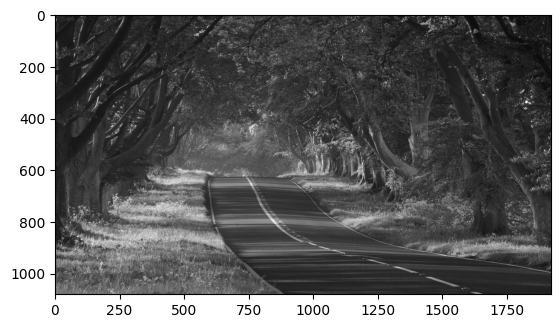

In [27]:
img = cv.imread('imgs/highway.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

## Compress


### DCT

(array([[0.000e+00, 5.000e+00, 9.390e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 1.800e+01, 1.061e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.000e+00, 7.000e+00, 1.069e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.080e+03, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([-555.95526692, -320.07224023,  -84.18921353,  151.69381316,
         387.57683985,  623.45986654,  859.34289323, 1095.22591992,
        1331.10894662, 1566.99197331, 1802.875     ]),
 <a list of 1920 BarContainer objects>)

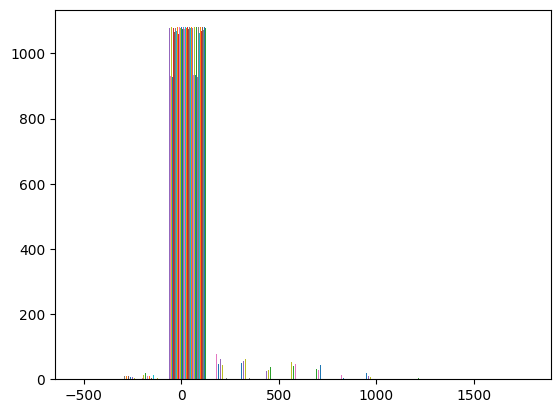

In [28]:
Y = DCT(img)
plt.hist(Y)

### Quantizando

(1080, 1920)

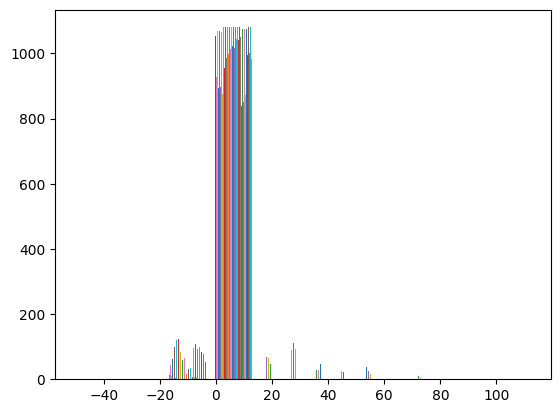

In [37]:
Y_quant = quant_DCT(Y)
plt.hist(Y_quant)

### Função de Predição + matriz de erros

### Huffman

In [50]:
'''
Func: weight_grey_tons
Description:
    Get the number of occurrence of each color
Input: quantizated transformed image (Future: Error quantizated transformed image)
Output: table with the occurrence of each color
    [0     4] -> color 0 -> 4 times
    [1     1] -> color 1 -> 1 time
    [2     5]
    [3     6]
'''

def weight_grey_tons(img):
    # depth = 8
    # nLine, nCols = img.shape
    # hist = np.zeros((2**8))
    
    #get unique values and counts of each value
    unique, counts = np.unique(img.flatten(), return_counts=True)

    #display unique values and counts side by side
    occurrence = np.asarray((unique, counts)).T

    return occurrence

'''
Func: huffman_tree
Description:
    Create the the tree representation for the Huff Algorithm
Input: Color occurency 
    Accept Format
    [0     4] -> color 0 -> 4 times
    [1     1] -> color 1 -> 1 time
    [2     5]
    [3     6]

Output: Tree

To-do
    Priority_queue
    Tree
'''

def huffman_tree(ocurrence):

    nLine, _ = ocurrence.shape
    
    class Tree:
        def __init__(self, data):
            self.left = None
            self.right = None
            self.data = data

    forest = []

    # Populate the list
    for i in range (nLine):
        color, times =  ocurrence[i]
        tree = Tree(color)
        forest.append((times, color, tree)) # Why a tuple? Is easier to use a tuple than define a __lt__ to compare the objects

    # Create a priority list
    heapq.heapify(forest)


    count = 300
    while(len(forest) > 0):
        first_small = heapq.heappop(forest)
        second_small = heapq.heappop(forest)

        tree

    return first_small, second_small

    
    


#### Teste

In [60]:
output = weight_grey_tons(img)
huffman_tree(output)

((1, 1, <__main__.huffman_tree.<locals>.Tree at 0x7fc1410e5c90>),
 (3, 254, <__main__.huffman_tree.<locals>.Tree at 0x7fc148e0cbd0>))

## Unconpress

### Huffman

### Dequantizando

In [30]:
Y_dequant = dequant_DCT(Y_quant)

### Transformada inversa

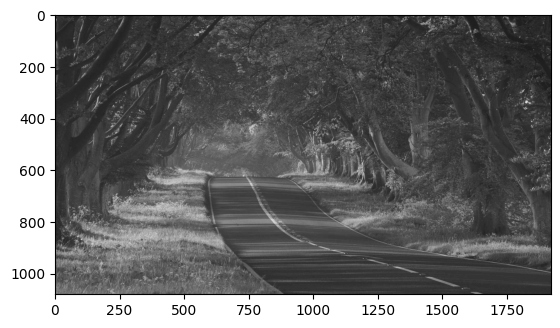

In [31]:
img_rec = iDCT(Y_dequant)
plt.imshow((img_rec), cmap='gray')


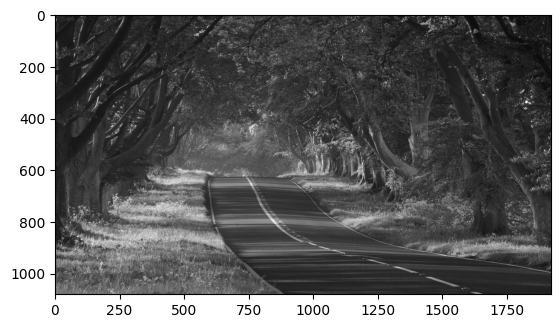

In [32]:
plt.imshow((img), cmap='gray')

# Análises


In [33]:
print(f'MSE: {((img - img_rec)**2).sum()/img.size}')
print(f'ME: {np.abs(img - img_rec).max()}')

MSE: 38.45537597648706
ME: 57.36000357755324


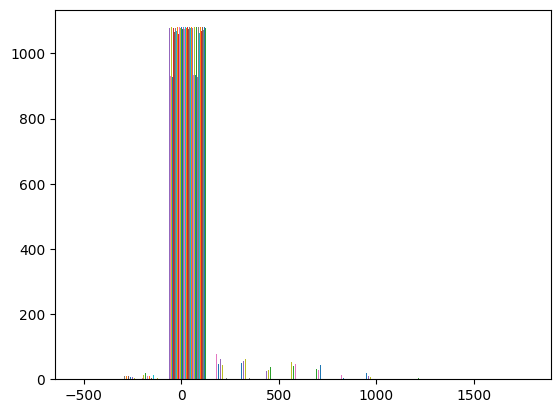

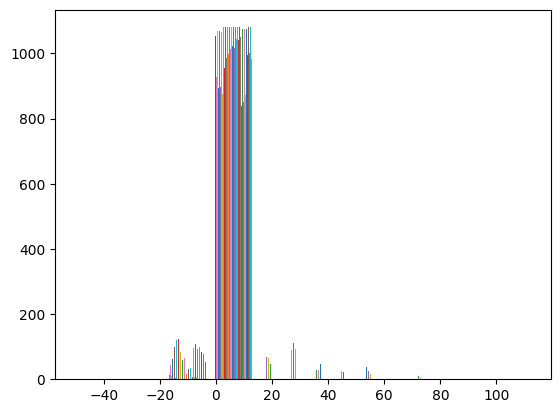

In [34]:
# histogramas de Y e Y_quant para, posteriormente, criar matriz de erros para huffman
# observe o eixo-x, i.e. os erros serão mais próximos
plt.hist(Y)
plt.show()
plt.hist(Y_quant)
plt.show()

In [35]:
(np.unique(Y).size, np.unique(Y_quant).size)

(1353238, 148)